In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

C:\Users\austinsh\AppData\Local\Temp\ipykernel_17260\1921586718.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [3]:
#df_C10inC4dist = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_C10inC4dist.csv')

# df_C10inC4dist = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\Project rC4\Jupyter Notebooks\0 - Current\2 EDA\outlierHandling.csv")

df_C10inC4dist = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\II Data\2 Preprocessing\Continuous Data\contData_clean.csv")
# Print descriptive statistics for df_C10inC4dist
df_C10inC4dist.describe()

,425_pct_Al,Al2O3,M_Value,C4_pct_Eth,C4_pct_H2O,C4_pct_Hex,Butanol,Decanol,Ethanol,Hexanol,Octanol,HydWtr_pct_Ammonia,HydWtr_Na2O,AYC55580,DI55102,DI55152,DI55580,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,II52554,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,VI52558B
count,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000,40127.000000
mean,6.133712,11.382610,3.597077,1.213861,21.178586,0.471405,9.097426,3.114636,19.368811,3.665954,4.270774,0.967939,0.789882,11.106674,0.944623,0.932484,0.995797,36811.095494,32866.825818,5994.183724,845.358602,44806.974341,40473.976083,36493.996661,28208.902614,6599.391815,370.830216,0.998758,0.772741,36402.826952,170.599779,63.161923,62.999857,56.453715,69.400958,41.197444,47.683837,35.824183,2.183557,-1.493130,1.018803,74.558815,168.669383,180.878169,180.993123,197.350585,73.006564,128.880168,200.626470,196.849812,194.540385,189.889625,185.814189,223.379511,218.166975,2.830012
std,0.229069,0.547888,0.180890,0.692503,2.751294,0.241560,9.024005,1.518655,18.535968,1.948907,2.144554,0.146906,0.689519,4.087796,0.051776,0.029015,0.046053,4311.627143,6142.280506,824.261804,610.986652,5949.433189,5335.439123,4137.140382,3340.330378,372.658838,262.256204,0.036322,0.021794,4005.413257,28.885462,2.611648,7.290771,10.004467,2.890560,1.555107,28.772344,20.401483,1.139412,1.129831,0.981951,16.293286,15.580895,27.783800,1.543444,13.038620,14.901401,11.140228,17.679004,13.690945,13.581476,9.111545,9.669426,10.256584,3.419686,0.995163
min,5.268290,9.738800,1.253440,0.026531,7.606320,0.000321,0.000000,0.000000,0.000000,0.000000,0.000000,0.366569,0.000000,0.000000,0.800007,0.837832,0.853967,19249.500000,12699.500000,2873.730000,0.000000,21122.000000,19227.500000,18969.100000,14364.900000,5119.710000,0.000000,0.811764,0.696182,18434.200000,77.923500,53.656300,41.398300,27.970000,60.183500,32.042400,0.000000,0.006367,0.001366,-4.856830,-1.748120,27.143100,119.683000,110.534000,175.546000,156.727000,27.985400,96.720000,161.963000,167.953000,164.345000,172.232000,159.837000,207.365000,206.986000,0.644656
25%,6.003465,11.096400,3.502750,0.621587,18.841700,0.353835,3.846945,1.960000,5.900000,2.130070,2.592545,0.877052,0.449473,9.924740,0.911098,0.913068,0.965977,35739.700000,29068.700000,5496.925000,291.609000,42198.900000,38570.650000,35401.350000,27329.850000,6364.805000,182.811500,0.974867,0.759202,35277.900000,149.521500,61.812500,58.662150,46.521350,66.841000,40.846150,23.318200,18.997750,1.287500,-2.362675,0.240305,63.894000,154.874000,161.732500,179.961000,186.081000,62.530300,121.002000,186.434000,186.070000,184.058500,182.661000,178.603000,217.464000,215.527500,2.127010
50%,6.135840,11.495800,3.587960,1.103180,21.462900,0.446940,5.790710,3.032810,13.043500,3.420000,4.165000,0.939770,0.646366,10.786900,0.949496,0.932305,0.997192,38146.000000,32985.500000,6016.260000,840.731000,46087.100000,41596.000000,37985.300000,29274.100000,6578.840000,341.189000,0.998093,0.774090,37641.100000,167.449000,63.556800,65.211200,59.831300,70.055500,41.269800,49.597200,40.975900,1.942890,-1.484200,0.802956,75.437500,172.954000,175.403000,180.109000,200.170000,76.155300,

In [4]:
num_columns = df_C10inC4dist.shape[1]
print("Number of features:", num_columns)

Number of features: 57


In [5]:
# Assuming df_C10inC4dist is your DataFrame
non_date_columns = df_C10inC4dist.columns[df_C10inC4dist.columns != 'Date']

# Drop rows where any value (excluding 'Date') is 0 or less
df_C10inC4dist = df_C10inC4dist.drop(df_C10inC4dist[(df_C10inC4dist[non_date_columns] <= 0).any(axis=1)].index)

df_C10inC4dist



,425_pct_Al,Al2O3,M_Value,C4_pct_Eth,C4_pct_H2O,C4_pct_Hex,Butanol,Decanol,Ethanol,Hexanol,Octanol,HydWtr_pct_Ammonia,HydWtr_Na2O,AYC55580,DI55102,DI55152,DI55580,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,II52554,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,VI52558B,Date
118,6.43708,11.8700,3.55664,0.453463,15.2535,0.271862,26.08800,3.03005,25.18470,3.44378,4.72283,0.652583,0.831547,10.93530,0.951956,0.954333,1.009710,39314.1,33464.8,7483.32,1538.350,48117.3,42632.4,39868.4,31238.6,6259.81,735.062,0.999725,0.779502,39994.4,191.900,61.1192,65.0270,59.9378,64.4448,39.7649,20.1205,22.3030,0.814094,0.000584,0.555986,80.5892,161.123,175.117,180.148,214.608,77.1664,145.120,198.617,193.669,188.059,186.868,184.676,211.135,215.333,5.67422,2012-06-14 14:00:00
143,6.46482,11.1375,3.58727,0.990203,15.4513,0.337285,4.65101,3.25125,5.72963,3.09228,4.17926,0.781047,0.628842,8.58641,0.947882,0.942674,0.992038,19655.7,20207.8,6825.36,1094.490,25197.3,23316.0,19094.6,14804.3,6261.57,757.480,1.148680,0.780820,21783.9,131.363,58.3114,65.3952,60.0296,64.9352,39.9153,35.6994,21.4416,0.637021,0.006271,0.215191,74.9877,168.938,168.920,180.338,212.092,76.4163,131.953,194.199,190.152,183.424,185.541,181.733,215.653,213.648,1.47055,2012-06-16 08:00:00
144,6.46614,10.9325,3.58837,1.019900,15.4759,0.342041,3.39165,2.93443,3.82419,2.47385,3.51456,0.783588,0.622102,8.35520,0.951983,0.946026,0.989549,19845.7,20580.7,6406.08,724.611,25879.7,25878.1,19025.8,14805.2,6267.59,731.939,1.146330,0.779348,21808.9,132.973,56.8293,65.4264,59.9995,65.5999,40.1889,35.6895,21.5114,1.054450,0.050000,0.419643,79.6852,168.500,138.373,180.266,213.620,81.6344,137.417,182.716,183.614,179.812,182.819,180.337,216.347,214.641,1.36705,2012-06-16 10:00:00
145,6.46680,10.8300,3.58892,1.034750,15.4882,0.344419,3.26391,2.84643,3.61047,2.40908,3.41467,0.784858,0.618732,8.13894,0.951323,0.950431,0.988234,19939.8,19424.7,6744.99,867.936,24299.3,22913.6,19061.0,14834.1,6263.70,739.611,1.146970,0.781014,21722.7,125.934,56.2870,64.6407,60.2889,64.5336,39.6693,35.6695,21.5212,1.503860,0.059376,0.316942,85.1052,168.730,150.907,180.129,212.960,84.9588,139.245,183.378,182.369,176.797,180.356,177.428,215.979,214.026,1.73102,2012-06-16 11:00:00
146,6.46879,10.7450,3.59057,1.079290,15.5251,0.351552,2.88067,2.58243,2.96931,2.21476,3.11502,0.788669,0.608622,8.35302,0.949386,0.949784,0.989314,19711.9,19547.5,6322.87,942.248,24424.9,24484.7,19106.9,14800.6,6258.89,734.121,1.152860,0.782479,21818.1,127.092,54.2500,65.0161,59.9602,65.3578,39.9072,35.6595,21.6453,1.509430,0.058519,0.454547,100.2490,168.942,157.078,179.941,159.938,90.9046,141.409,186.018,183.725,177.816,181.134,177.805,216.637,214.751,2.20281,2012-06-16 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40028,5.87661,11.6212,4.08648,0.692500,17.2055,0.212052,11.40000,7.11000,7.30000,6.87000,10.29000,0.901833,1.465950,2.32366,0.987967,0.954871,0.926518,29811.6,18660.3,3989.26,451.889,29821.5,26778.5,30109.4,22871.5,5477.31,218.981,0.978968,0.759699,29467.6,114.586,55.8564,68.7621,75.8854,69.3126,39.9804,73.0791,60.1048,4.847160,0.156706,3.151870,79.0732,152.487,136.623,183.957,176.225,85.9974,135.637,175.033,177.523,174.537,178.610,163.229,257.117,225.725,2.78001,2020-06-14 10:00:00
40072,5.63644,11.6252,3.99731,0.583157,16.8899,0.222163,5.49000,1.51000,3.74000,3.84000,4.42000,0.934922,2.432020,2.02312,0.983908,0.958770,0.924866,22157.0,18637.7,4985.26,331.433,31458.3,26625.8,30548.3,23193.7,5491.77,200.917,0.981316,0.757841,29937.5,114.763,63.6702,68.7386,74.6229,68.4728,39.8914,51.3722,53.2249,4.683050,0.036560,3.008160,81.1621,156.375,135.792,

In [6]:
df_C10inC4dist['Date'] = pd.to_datetime(df_C10inC4dist['Date'])
print(df_C10inC4dist.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


425_pct_Al                   float64
Al2O3                        float64
M_Value                      float64
C4_pct_Eth                   float64
C4_pct_H2O                   float64
C4_pct_Hex                   float64
Butanol                      float64
Decanol                      float64
Ethanol                      float64
Hexanol                      float64
Octanol                      float64
HydWtr_pct_Ammonia           float64
HydWtr_Na2O                  float64
AYC55580                     float64
DI55102                      float64
DI55152                      float64
DI55580                      float64
FC42428                      float64
FC52018                      float64
FC55003                      float64
FC55009                      float64
FC55102                      float64
FC55152                      float64
FC55552                      float64
FC55555                      float64
FC55569                      float64
FC55576                      float64
F

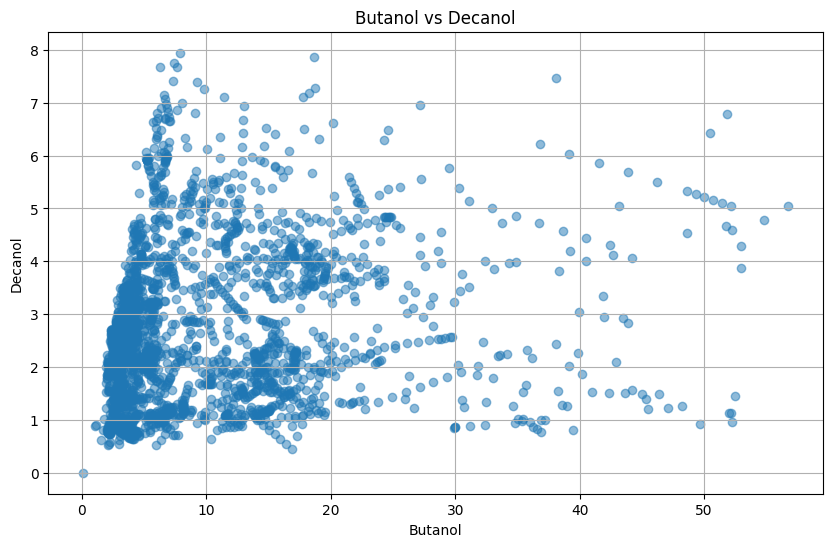

In [7]:

# Assuming your DataFrame is named df_C10inC4dist and it has columns 'Butanol' and 'Decanol'

plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
plt.scatter(df_C10inC4dist['Butanol'], df_C10inC4dist['Decanol'], alpha=0.5)  # Create a scatter plot
plt.title('Butanol vs Decanol')  # Set the title of the plot
plt.xlabel('Butanol')  # Set the x-axis label
plt.ylabel('Decanol')  # Set the y-axis label
plt.grid(True)  # Add a grid for easier reading
plt.show()  # Display the plot


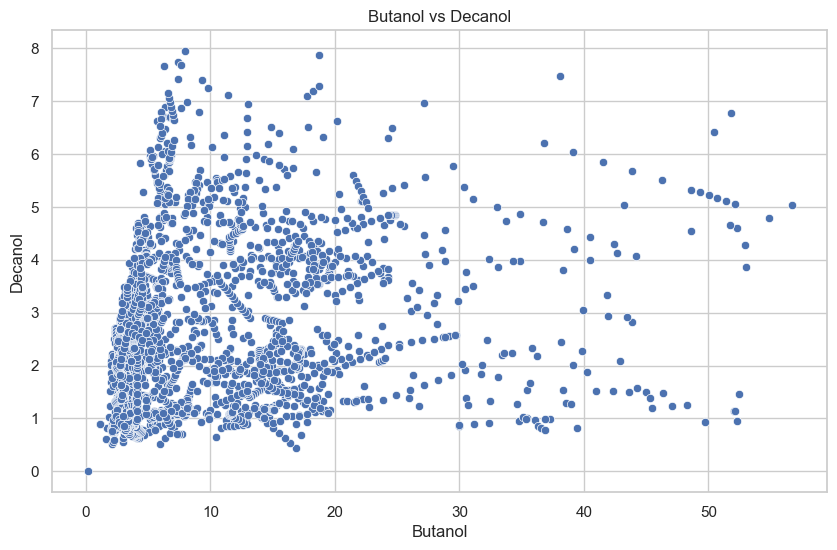

In [8]:


# Assuming your DataFrame is named df_C10inC4dist and it has columns 'Butanol' and 'Decanol'

sns.set_theme(style="whitegrid")  # Set the theme for the plot with a white grid background
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Butanol', y='Decanol', data=df_C10inC4dist)
plt.title('Butanol vs Decanol')
plt.show()


C:\Users\austinsh\AppData\Local\Temp\ipykernel_17260\3461588184.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decanol_counts_per_bin = df_C10inC4dist.groupby('Butanol_bins')['Decanol'].count()


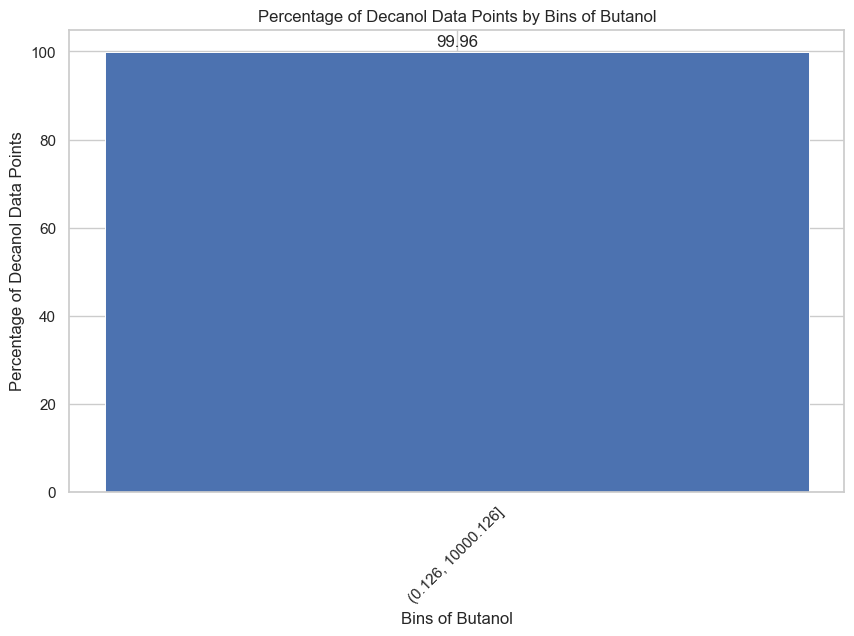

In [9]:

# Assuming your DataFrame is named df_C10inC4dist and it has columns 'Butanol' and 'Decanol'

# Create bins for the Butanol variable from the min to max in increments of 5
bin_width = 10000
bins = np.arange(df_C10inC4dist['Butanol'].min(), df_C10inC4dist['Butanol'].max() + bin_width, bin_width)
df_C10inC4dist['Butanol_bins'] = pd.cut(df_C10inC4dist['Butanol'], bins)

# Get the counts for Decanol in each bin
decanol_counts_per_bin = df_C10inC4dist.groupby('Butanol_bins')['Decanol'].count()

# Calculate the percentage of Decanol data points in each bin
total_decanol_counts = df_C10inC4dist['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add the text annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\austinsh\AppData\Local\Temp\ipykernel_17260\3468618090.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()


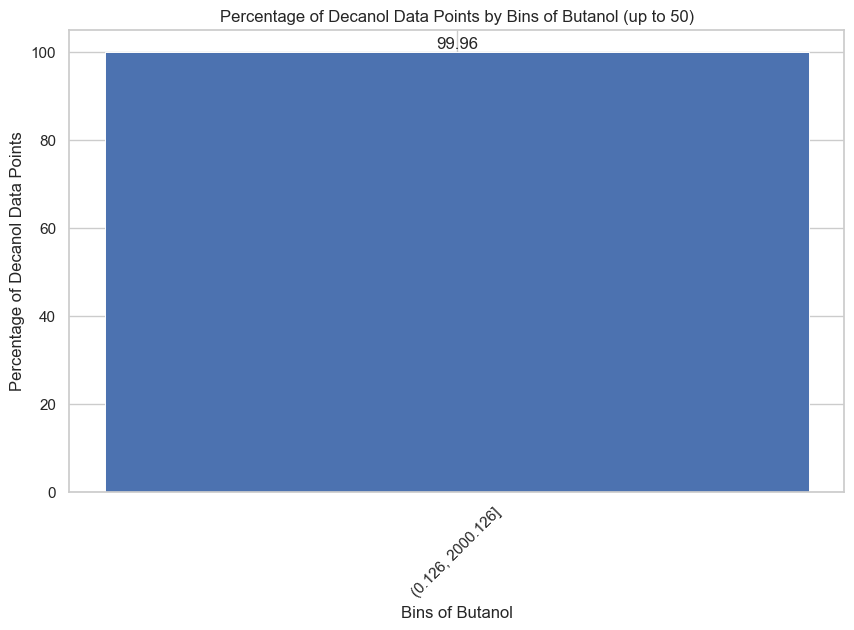

In [10]:

# Assuming you have a DataFrame df_C10inC4dist with 'Butanol' and 'Decanol' columns
# Let's say you want to set the maximum Butanol value to 50 for the chart
max_butanol_value = 10000
filtered_df = df_C10inC4dist[df_C10inC4dist['Butanol'] <= max_butanol_value].copy()  # Create a copy to avoid SettingWithCopyWarning

# Now create bins from the filtered data
bin_width = 2000
bins = np.arange(filtered_df['Butanol'].min(), filtered_df['Butanol'].max() + bin_width, bin_width)

# The adjusted line to avoid the DeprecationWarning
filtered_df['Butanol_bins'] = pd.cut(filtered_df['Butanol'], bins)

# Calculate the percentage of Decanol data points in each bin
decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()
total_decanol_counts = filtered_df['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol (up to 50)')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\austinsh\AppData\Local\Temp\ipykernel_17260\1587786242.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()


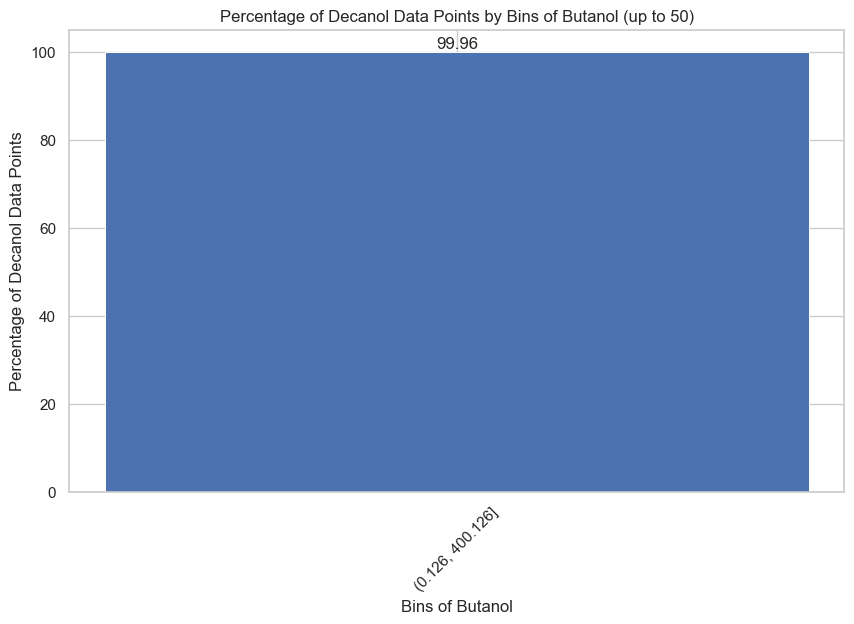

In [11]:

# Assuming you have a DataFrame df_C10inC4dist with 'Butanol' and 'Decanol' columns
# Let's say you want to set the maximum Butanol value to 50 for the chart
max_butanol_value = 2000
filtered_df = df_C10inC4dist[df_C10inC4dist['Butanol'] <= max_butanol_value].copy()  # Create a copy to avoid SettingWithCopyWarning

# Now create bins from the filtered data
bin_width = 400
bins = np.arange(filtered_df['Butanol'].min(), filtered_df['Butanol'].max() + bin_width, bin_width)

# The adjusted line to avoid the DeprecationWarning
filtered_df['Butanol_bins'] = pd.cut(filtered_df['Butanol'], bins)

# Calculate the percentage of Decanol data points in each bin
decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()
total_decanol_counts = filtered_df['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol (up to 50)')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\austinsh\AppData\Local\Temp\ipykernel_17260\1468654771.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()


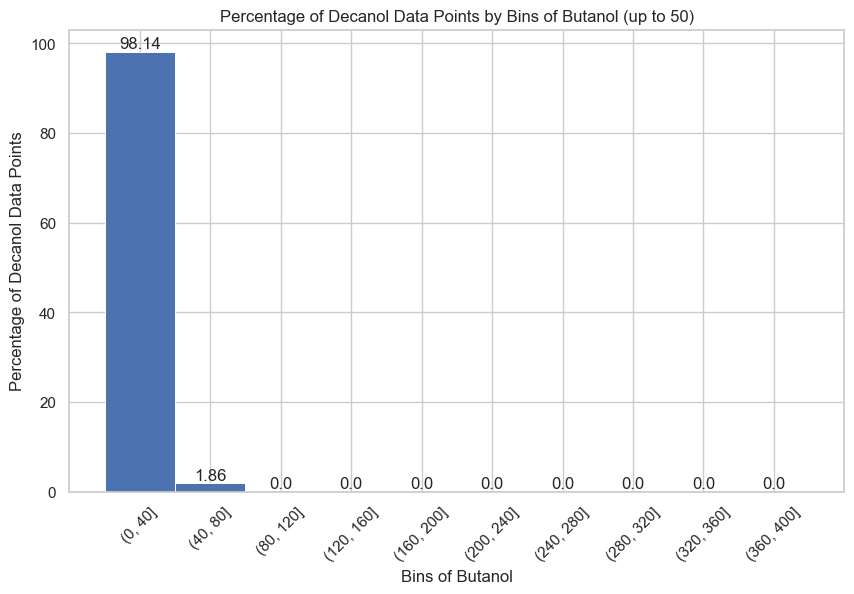

In [12]:
# Set the maximum value of Butanol you want to consider
max_butanol_value = 400  # Replace with your desired max value

# Filter the DataFrame to only include Decanol values less than 5
# and Butanol values less than or equal to max_butanol_value
df_filtered = df_C10inC4dist[(df_C10inC4dist['Decanol'] < 5) & (df_C10inC4dist['Butanol'] <= max_butanol_value)]

# Now proceed with the binning on this filtered DataFrame
bin_width = 40
bins = np.arange(0, max_butanol_value + bin_width, bin_width)  # start from 0 for consistent binning
filtered_df['Butanol_bins'] = pd.cut(filtered_df['Butanol'], bins)


# Calculate the percentage of Decanol data points in each bin
decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()
total_decanol_counts = filtered_df['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol (up to 50)')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\austinsh\AppData\Local\Temp\ipykernel_17260\1841633057.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()


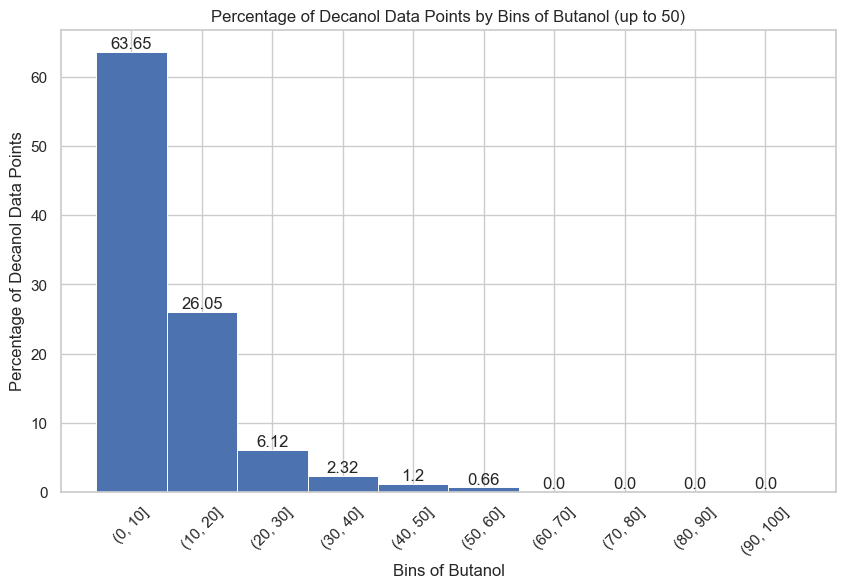

In [13]:
# Set the maximum value of Butanol you want to consider
max_butanol_value = 100  # Replace with your desired max value

# Filter the DataFrame to only include Decanol values less than 5
# and Butanol values less than or equal to max_butanol_value
df_filtered = df_C10inC4dist[(df_C10inC4dist['Decanol'] < 5) & (df_C10inC4dist['Butanol'] <= max_butanol_value)]

# Now proceed with the binning on this filtered DataFrame
bin_width = 10
bins = np.arange(0, max_butanol_value + bin_width, bin_width)  # start from 0 for consistent binning
filtered_df['Butanol_bins'] = pd.cut(filtered_df['Butanol'], bins)


# Calculate the percentage of Decanol data points in each bin
decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()
total_decanol_counts = filtered_df['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol (up to 50)')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\austinsh\AppData\Local\Temp\ipykernel_17260\1417869908.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Butanol_counts_per_bin = filtered_df.groupby('FC55555_bins')['Butanol'].count()


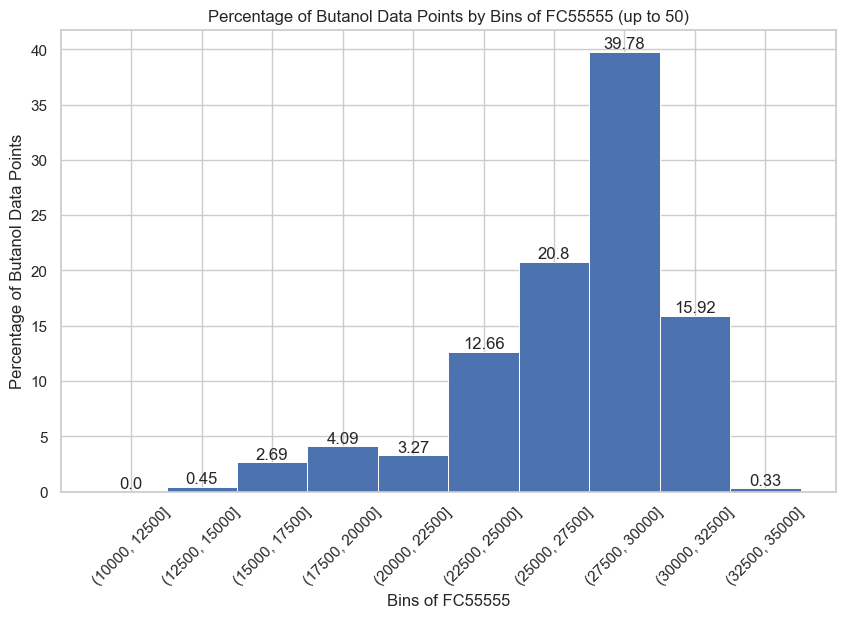

In [14]:
# Set the maximum value of FC55555 you want to consider
max_FC55555_value = 35000  # Replace with your desired max value
min_FC55555_value = 10000

# Filter the DataFrame to only include Butanol values less than 5
# and FC55555 values less than or equal to max_FC55555_value
df_filtered = df_C10inC4dist[(df_C10inC4dist['Decanol'] < 5) & 
                      (df_C10inC4dist['Butanol'] < 62) & 
                      (df_C10inC4dist['FC55555'] <= max_FC55555_value) &
                      (df_C10inC4dist['FC55555'] >= min_FC55555_value)
                      ]

# Now proceed with the binning on this filtered DataFrame
bin_width = 2500
bins = np.arange(min_FC55555_value, max_FC55555_value + bin_width, bin_width)  # start from 0 for consistent binning
filtered_df['FC55555_bins'] = pd.cut(filtered_df['FC55555'], bins)


# Calculate the percentage of Butanol data points in each bin
Butanol_counts_per_bin = filtered_df.groupby('FC55555_bins')['Butanol'].count()
total_Butanol_counts = filtered_df['Butanol'].count()
Butanol_percentage_per_bin = (Butanol_counts_per_bin / total_Butanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(Butanol_percentage_per_bin.index.astype(str), Butanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Butanol Data Points by Bins of FC55555 (up to 50)')
plt.xlabel('Bins of FC55555')
plt.ylabel('Percentage of Butanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
